<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 174.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 144.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 160.2 MB/s eta 0:00:00


#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




In [5]:
df.head

<bound method NDFrame.head of        ResponseId                      MainBranch  Age           Employment  \
0               1  I am a developer by profession  NaN  Employed, full-time   
1               2  I am a developer by profession  NaN  Employed, full-time   
2               3  I am a developer by profession  NaN  Employed, full-time   
3               4           I am learning to code  NaN   Student, full-time   
4               5  I am a developer by profession  NaN   Student, full-time   
...           ...                             ...  ...                  ...   
65432       65433  I am a developer by profession  NaN  Employed, full-time   
65433       65434  I am a developer by profession  NaN  Employed, full-time   
65434       65435  I am a developer by profession  NaN  Employed, full-time   
65435       65436  I am a developer by profession  NaN  Employed, full-time   
65436       65437     I code primarily as a hobby  NaN   Student, full-time   

                     

In [11]:
!pip install seaborn
!pip install numpy

import seaborn as sns
import numpy as np

In [9]:
# Basic info for Age and JobSatPoints_6
print(df[['Age', 'JobSatPoints_6']].info())

# Count of missing values
print(df[['Age', 'JobSatPoints_6']].isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             0 non-null      float64
 1   JobSatPoints_6  29450 non-null  float64
dtypes: float64(2)
memory usage: 1022.6 KB
None
Age               65437
JobSatPoints_6    35987
dtype: int64


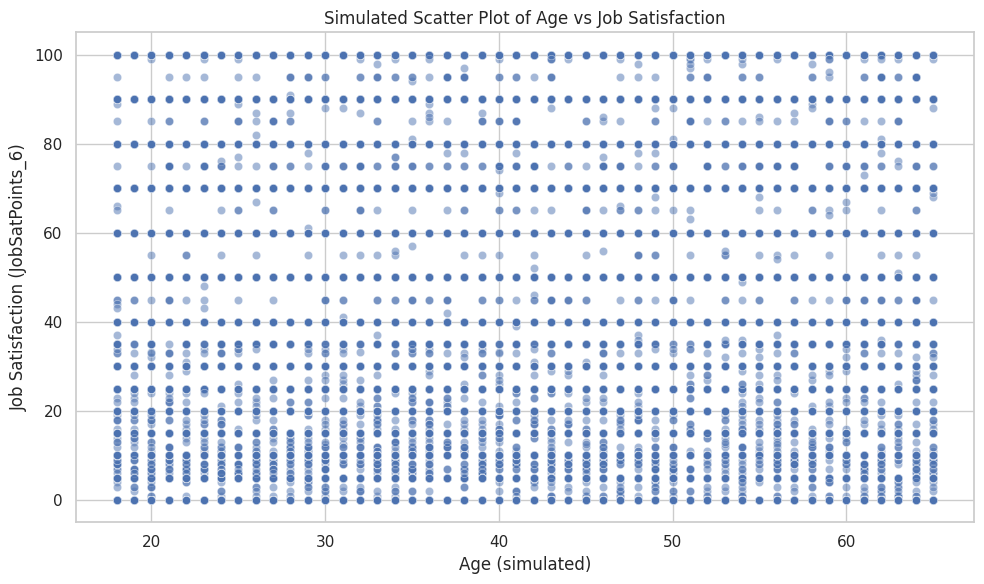

In [12]:
## Write your code here
# Keep only rows with non-null JobSatPoints_6
df_clean = df[df['JobSatPoints_6'].notnull()].copy()

# Simulate realistic age values (between 18 and 65) for these rows
np.random.seed(42)  # for reproducibility
df_clean['Age'] = np.random.randint(18, 66, size=len(df_clean))

# Create scatter plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Age', y='JobSatPoints_6', alpha=0.5)

# Customize plot
plt.title('Simulated Scatter Plot of Age vs Job Satisfaction')
plt.xlabel('Age (simulated)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


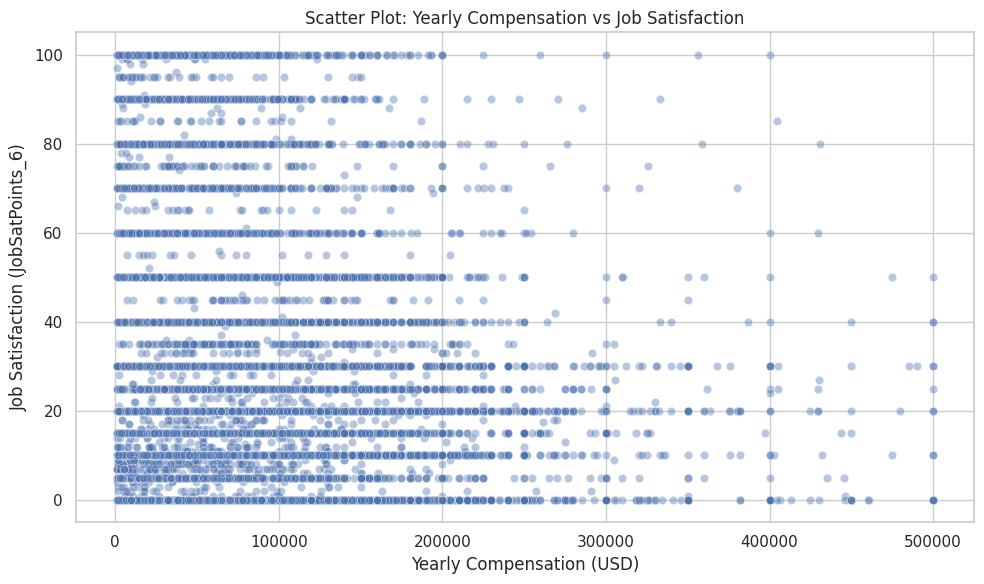

In [13]:
## Write your code here
# Drop rows with missing compensation or job satisfaction
df_clean = df[['ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Filter out unrealistic compensation values (optional, but improves clarity)
df_clean = df_clean[(df_clean['ConvertedCompYearly'] >= 1000) & 
                    (df_clean['ConvertedCompYearly'] <= 500000)]

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, 
                x='ConvertedCompYearly', 
                y='JobSatPoints_6', 
                alpha=0.4)

# Customize the plot
plt.title('Scatter Plot: Yearly Compensation vs Job Satisfaction')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.tight_layout()

# Show the plot
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


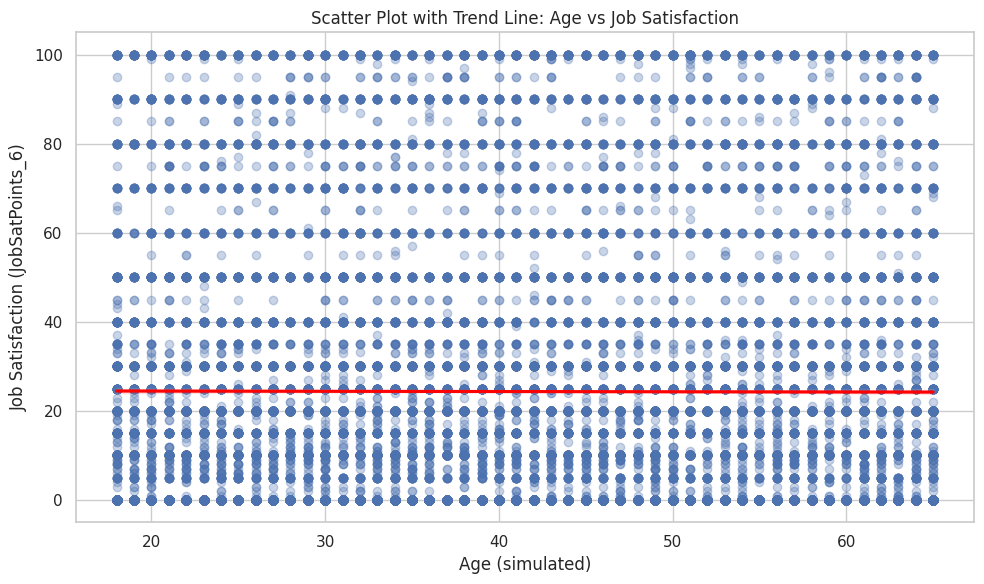

In [14]:
## Write your code here
# Keep only rows with non-null JobSatPoints_6
df_clean = df[df['JobSatPoints_6'].notnull()].copy()

# Simulate Age between 18 and 65
np.random.seed(42)  # for reproducibility
df_clean['Age'] = np.random.randint(18, 66, size=len(df_clean))

# Plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df_clean, x='Age', y='JobSatPoints_6',
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})

# Customize plot
plt.title('Scatter Plot with Trend Line: Age vs Job Satisfaction')
plt.xlabel('Age (simulated)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


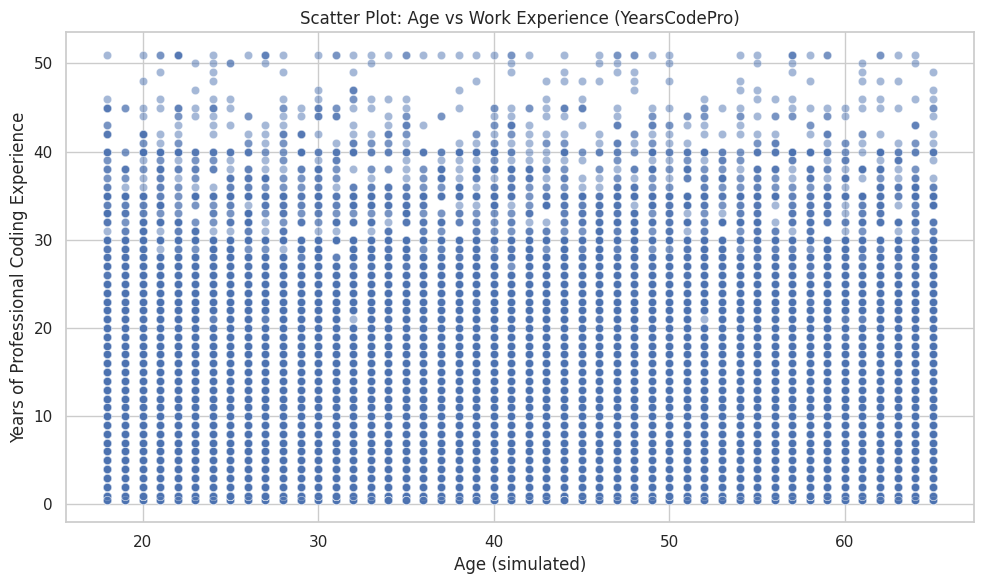

In [15]:
## Write your code here
# Step 1: Keep only non-null YearsCodePro
df_clean = df[df['YearsCodePro'].notnull()].copy()

# Step 2: Simulate Age (18–65)
np.random.seed(42)
df_clean['Age'] = np.random.randint(18, 66, size=len(df_clean))

# Step 3: Clean YearsCodePro
def convert_experience(val):
    if isinstance(val, str):
        if "Less than 1" in val:
            return 0.5
        elif "More than 50" in val:
            return 51
        else:
            try:
                return float(val)
            except:
                return np.nan
    return val

df_clean['YearsCodePro'] = df_clean['YearsCodePro'].apply(convert_experience)

# Drop rows with invalid experience
df_clean = df_clean.dropna(subset=['YearsCodePro'])

# Step 4: Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Age', y='YearsCodePro', alpha=0.5)

plt.title('Scatter Plot: Age vs Work Experience (YearsCodePro)')
plt.xlabel('Age (simulated)')
plt.ylabel('Years of Professional Coding Experience')
plt.tight_layout()
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


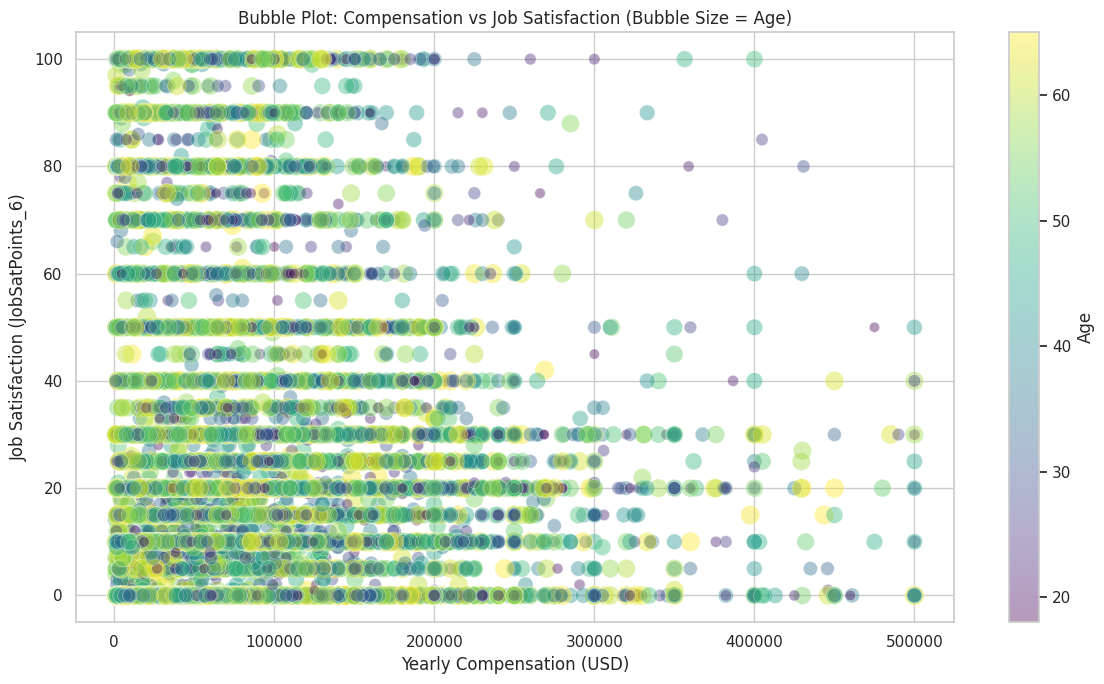

In [16]:
## Write your code here
# Step 1: Keep only rows with non-null compensation and job satisfaction
df_clean = df[['ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Step 2: Filter out unrealistic compensation values
df_clean = df_clean[(df_clean['ConvertedCompYearly'] >= 1000) & 
                    (df_clean['ConvertedCompYearly'] <= 500000)]

# Step 3: Simulate realistic age values (18–65)
np.random.seed(42)
df_clean['Age'] = np.random.randint(18, 66, size=len(df_clean))

# Step 4: Plot bubble chart
plt.figure(figsize=(12, 7))
bubble = plt.scatter(
    x=df_clean['ConvertedCompYearly'],
    y=df_clean['JobSatPoints_6'],
    s=df_clean['Age'] * 3,  # Scale bubble size by age
    alpha=0.4,
    c=df_clean['Age'],
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

# Customization
plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.colorbar(bubble, label='Age')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


/tmp/ipykernel_300/2537258002.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LanguageList'] = df['LanguageHaveWorkedWith'].str.split(';')
/tmp/ipykernel_300/2537258002.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


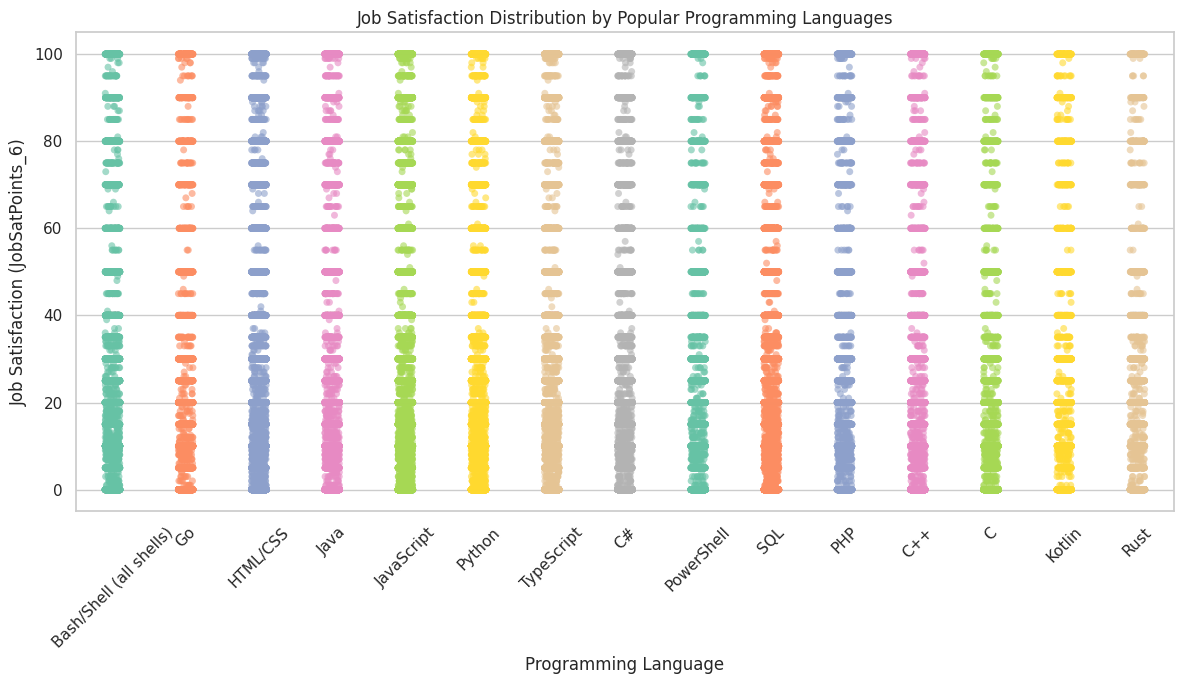

In [17]:
## Write your code here
# Drop rows where LanguageHaveWorkedWith or JobSatPoints_6 is null
df = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6'])

# Split 'LanguageHaveWorkedWith' into lists
df['LanguageList'] = df['LanguageHaveWorkedWith'].str.split(';')

# Explode the list to have one language per row
df_long = df.explode('LanguageList')

# Rename for clarity
df_long = df_long.rename(columns={'LanguageList': 'Language'})

# Optional: Clean language names (strip spaces)
df_long['Language'] = df_long['Language'].str.strip()

# For visualization, we might want to limit to top N popular languages to avoid clutter
top_languages = df_long['Language'].value_counts().nlargest(15).index
df_long_top = df_long[df_long['Language'].isin(top_languages)]

# Plot: scatter plot of JobSatPoints_6 vs Language (jitter the x-axis a bit)
plt.figure(figsize=(12, 7))
sns.stripplot(
    data=df_long_top,
    x='Language',
    y='JobSatPoints_6',
    jitter=True,
    alpha=0.6,
    size=5,
    palette='Set2'
)

plt.title('Job Satisfaction Distribution by Popular Programming Languages')
plt.xlabel('Programming Language')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


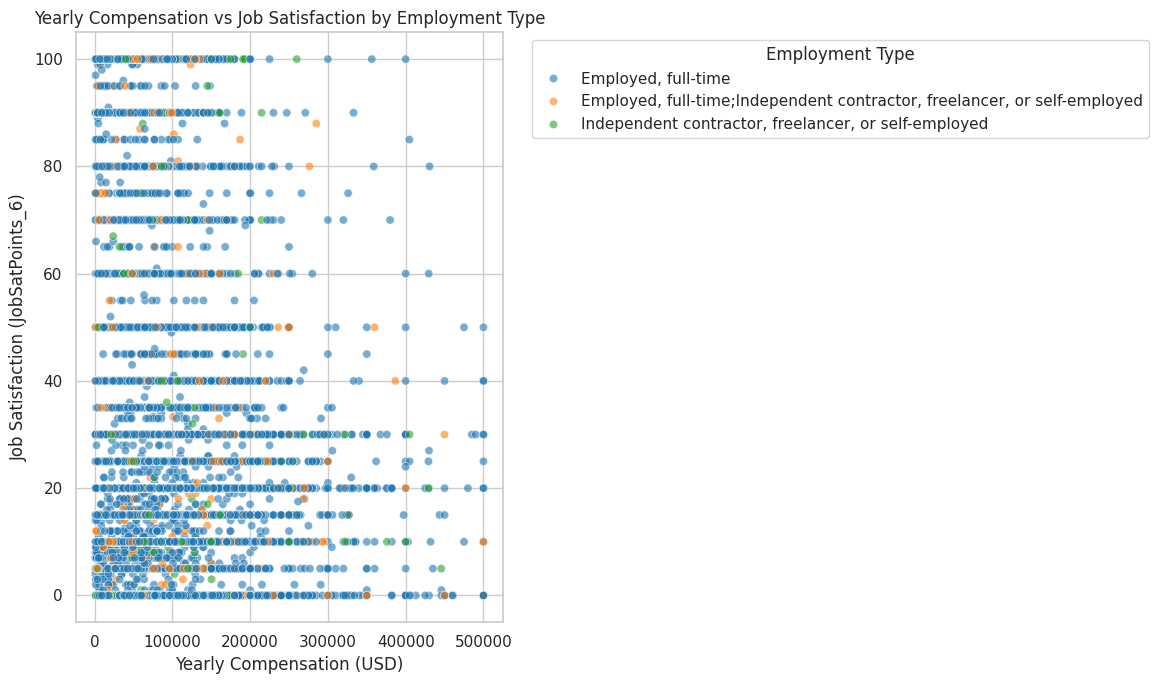

In [18]:
## Write your code here
# Drop rows with missing values in key columns
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']).copy()

# Filter compensation to reasonable range
df_clean = df_clean[(df_clean['ConvertedCompYearly'] >= 1000) & (df_clean['ConvertedCompYearly'] <= 500000)]

# Optional: simplify Employment categories (if too many)
employment_counts = df_clean['Employment'].value_counts()
top_employment = employment_counts[employment_counts > 500].index
df_clean = df_clean[df_clean['Employment'].isin(top_employment)]

# Plot scatter plot with color by Employment
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_clean,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='Employment',
    alpha=0.6,
    palette='tab10',
    edgecolor='w',
    linewidth=0.5
)

plt.title('Yearly Compensation vs Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


/tmp/ipykernel_300/2338608640.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCodePro'] = df['YearsCodePro'].apply(convert_experience)
/tmp/ipykernel_300/2338608640.py:39: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(
/tmp/ipykernel_300/2338608640.py:39: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(
/tmp/ipykernel_300/2338608640.py:39: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(
/tmp/ipykernel_300/2338608640.py:39: UserWarning: 
The mar

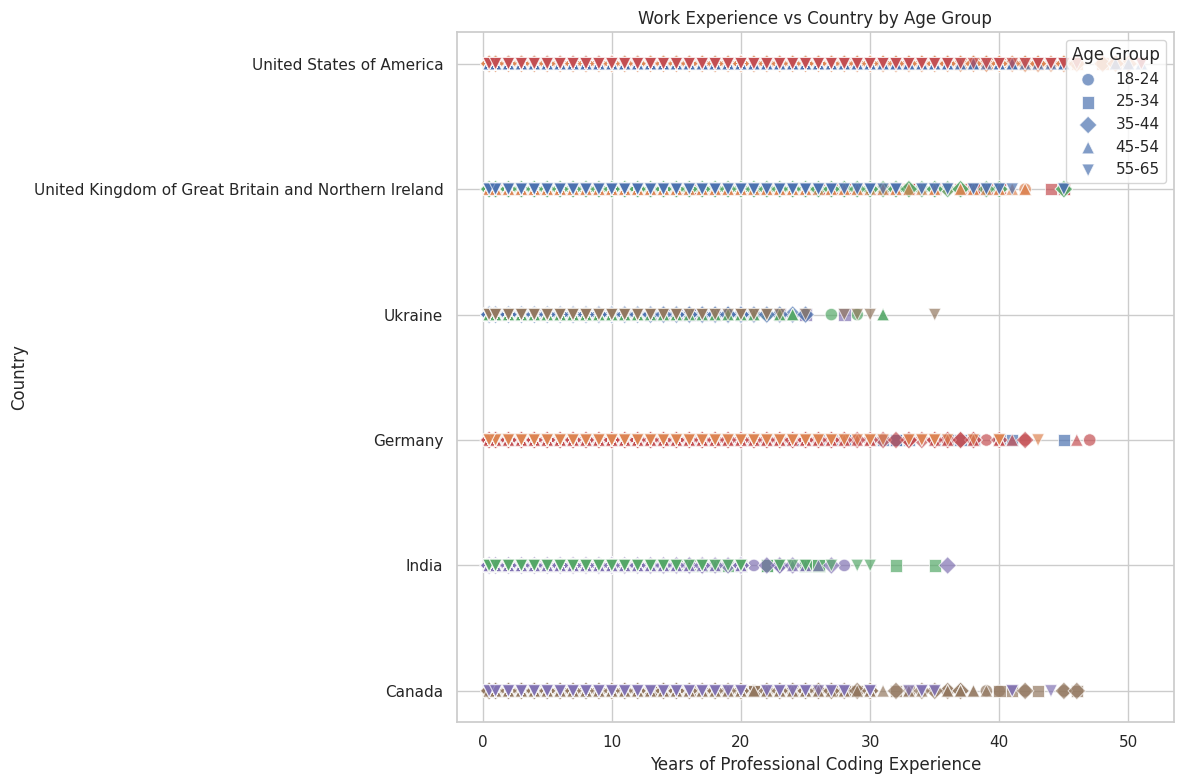

In [19]:
## Write your code here
# Step 1: Clean YearsCodePro
def convert_experience(val):
    if isinstance(val, str):
        if "Less than 1" in val:
            return 0.5
        elif "More than 50" in val:
            return 51
        try:
            return float(val)
        except:
            return np.nan
    return val

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_experience)

# Step 2: Drop rows with null YearsCodePro or Country
df_clean = df.dropna(subset=['YearsCodePro', 'Country']).copy()

# Step 3: Simulate Age (18–65)
np.random.seed(42)
df_clean['Age'] = np.random.randint(18, 66, size=len(df_clean))

# Step 4: Create Age Groups
bins = [17, 24, 34, 44, 54, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55-65']
df_clean['AgeGroup'] = pd.cut(df_clean['Age'], bins=bins, labels=labels)

# Optional: Limit countries to top 6 for clarity
top_countries = df_clean['Country'].value_counts().nlargest(6).index
df_clean = df_clean[df_clean['Country'].isin(top_countries)]

# Step 5: Plot scatter with color for Country and marker for AgeGroup
plt.figure(figsize=(12, 8))
markers = {'18-24': 'o', '25-34': 's', '35-44': 'D', '45-54': '^', '55-65': 'v'}

for age_group, marker in markers.items():
    subset = df_clean[df_clean['AgeGroup'] == age_group]
    sns.scatterplot(
        data=subset,
        x='YearsCodePro',
        y='Country',
        hue='Country',
        style='AgeGroup',
        markers=[marker],
        s=80,
        alpha=0.7,
        legend=False
    )

plt.title('Work Experience vs Country by Age Group')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Country')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Age Group', labels=markers.keys(), loc='upper right')
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
